In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("stemmed_sentences.csv", header=None, names=["review"])

In [5]:
df

,review
0,simpli incred
1,essenti patch first month addit immort empir g...
2,game game game game offici releas date
3,still game game game game game game game game ...
4,still launch properli freez launch otherwis ga...
...,...
3457,wish often struggl navig
3458,reli onlin guid find way slightli detract over...
3459,first four chapter solid offer plenti content ...
3460,howev chapter five six feel bit rush could fle...


In [7]:
def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (stemmed_sentences)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")

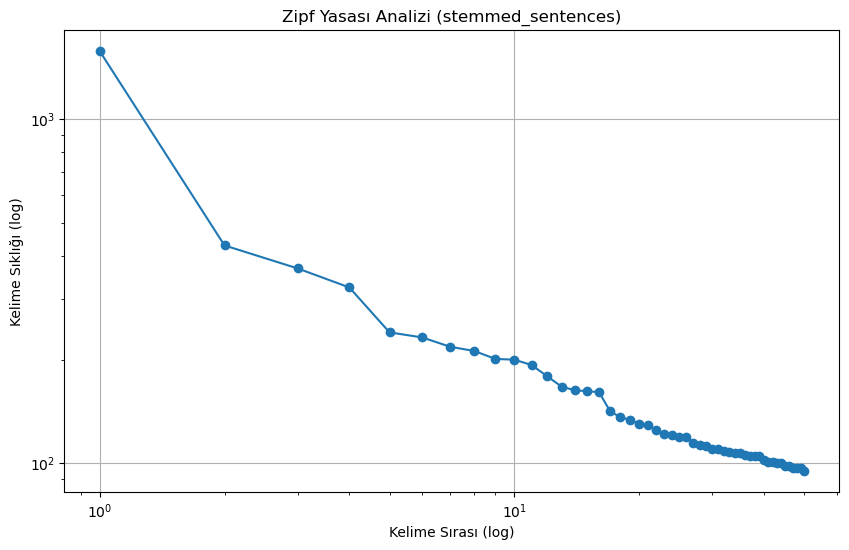

Toplam kelime sayısı: 38039
Farklı kelime sayısı: 4825
Veri seti yeterli büyüklükte.


In [9]:
df = pd.read_csv("stemmed_sentences.csv", header=None, names=["review"])
zipf_analysis(df["review"])